# Домашняя работа ко второму уроку

## В чём различие между зависимыми и независимыми выборками?

 Независимые выборки - сравниваются две разные группы, например мужчины и женщины, молодые и пожилые и т.д. Зависимые выборки как правило возникают, когда речь идет об одной группе испытуемых до и после эксперементального воздействия. Так же зависимыми выборками могут быть например мужья и жены, близнецы и т.п.

## Когда применяются параметрические статистические критерии, а когда — их непараметрические аналоги?

Непараметрические методы разработаны для тех ситуаций, когда исследователь ничего не знает о параметрах исследуемой популяции (отсюда и название методов - непараметрические). Говоря более специальным языком, непараметрические методы не основываются на оценке параметров (таких как среднее или стандартное отклонение) при описании выборочного распределения интересующей величины.

Поэтому эти методы иногда также называются свободными от параметров или свободно распределенными.

Непараметрические методы позволяют обрабатывать данные "низкого качества" из выборок малого объема с переменными, про распределение которых мало что или вообще ничего не известно.

Непараметрические методы наиболее приемлемы, когда объем выборок мал. Если данных много (например, n > 100), то не имеет смысла использовать непараметрические статистики. 

Дело в том, что когда выборки становятся очень большими, то выборочные средние подчиняются нормальному закону, даже если исходная переменная не является нормальной или измерена с погрешностью. 

Непараметрические тесты имеют меньшую статистическую мощность (менее чувствительны), чем их параметрические конкуренты, и если важно обнаружить даже слабые отклонения, следует особенно внимательно выбирать статистику критерия.

Параметрические методы основаны на некоторых, как правило, вполне вероятных предположениях о характере распределения случайной величины. Обычно параметрические методы, используемые в анализе экспериментальных данных, основаны на предположении нормальности распределения этих данных. Следствием такого предположения является необходимость оценки исследуемых параметров распределения. Такими оцениваемыми параметрами являются математическое ожидание и дисперсия. 

Достоинством методов параметрического анализа данных является тот факт, что они обладают достаточно высокой мощностью.

## 3.
Скачать данные из соревнования, пока можете работать только с train.csv. Считать их.

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - баллы кредитного рейтинга
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve)

In [2]:
TRAIN_DATASET_PATH = 'data/course_project/train.csv'
# TEST_DATASET_PATH = './data/course_project/test.csv'

In [3]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head(3)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0


Посчитать основные статистики по каждому признаку (минимальные, максимальные, средние значения).
Сделать выводы об адекватности этих статистик.

In [4]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Home Ownership,7500,4,Home Mortgage,3637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual Income,5943,NaN,NaN,NaN,1.36639e+06,845339,164597,844341,1.16839e+06,1.64014e+06,1.01493e+07
Years in current job,7129,11,10+ years,2332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tax Liens,7500,NaN,NaN,NaN,0.0301333,0.271604,0,0,0,0,7
Number of Open Accounts,7500,NaN,NaN,NaN,11.1309,4.90892,2,8,10,14,43
Years of Credit History,7500,NaN,NaN,NaN,18.3175,7.04195,4,13.5,17,21.8,57.7
Maximum Open Credit,7500,NaN,NaN,NaN,945154,1.60262e+07,0,279230,478159,793502,1.30473e+09
Number of Credit Problems,7500,NaN,NaN,NaN,0.17,0.498598,0,0,0,0,7
Months since last delinquent,3419,NaN,NaN,NaN,34.6926,21.6888,0,16,32,50,118
Bankruptcies,7486,NaN,NaN,NaN,0.117152,0.347192,0,0,0,0,4


### Посчитать для каждого признака, сколько в нем уникальных значений и как часто они встречаются.
Сделать выводы по каждому признаку.

In [5]:
for col in df_train.columns:
    colmn = df_train[col].value_counts()
    print (colmn)
    print('*'*100)

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************
1161660.0    4
1058376.0    4
1338113.0    4
1043651.0    4
969475.0     4
            ..
1141254.0    1
7907382.0    1
1534478.0    1
972040.0     1
1654786.0    1
Name: Annual Income, Length: 5478, dtype: int64
****************************************************************************************************
10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************
0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: in

## 3. Используя выводы из двух предыдущих заданий, найдите те наблюдения, где есть пропуски, выбросы (неадекватные значения признака, которые отличаются от большинства), используя фильтрацию из pandas.

### Выглядит нездорово кредит на сумму 99999999. Скорее всего, ошибка

In [6]:
df_train.loc[df_train['Current Loan Amount']==99999999.0]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
22,Rent,463790.0,NaN,0.0,6.0,28.3,288442.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,157700.0,5063.0,738.0,0
27,Rent,1004055.0,8 years,0.0,7.0,14.5,328394.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,195966.0,6041.0,734.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,Rent,1406836.0,1 year,0.0,12.0,22.6,2383260.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,461054.0,7386.0,747.0,0
7445,Home Mortgage,1564384.0,6 years,0.0,21.0,17.3,1545016.0,0.0,NaN,0.0,other,Long Term,99999999.0,1043442.0,32461.0,728.0,0
7464,Home Mortgage,1159152.0,6 years,0.0,14.0,22.0,389356.0,1.0,77.0,1.0,debt consolidation,Short Term,99999999.0,49438.0,18257.0,737.0,0
7475,Rent,848426.0,10+ years,0.0,8.0,20.1,526306.0,0.0,12.0,0.0,debt consolidation,Short Term,99999999.0,83638.0,16473.0,742.0,0


### Определим столбики с пропусками данных

In [7]:
for col in df_train.columns:
    count = df_train[col].count()
    if count < df_train.shape[0]:
        print(f'Column-{col} : q-ty = {count}')
#         print('*'*100)



Column-Annual Income : q-ty = 5943
Column-Years in current job : q-ty = 7129
Column-Months since last delinquent : q-ty = 3419
Column-Bankruptcies : q-ty = 7486
Column-Credit Score : q-ty = 5943


### Вызывыют удивление люди, у которых есть кредит, но указано, что им выдавалось максимально не более 0

In [8]:
df_train.loc[(df_train['Maximum Open Credit'] == 0) & (df_train['Current Loan Amount'] > 0)]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
91,Rent,601369.0,10+ years,0.0,6.0,16.9,0.0,0.0,14.0,0.0,debt consolidation,Short Term,165924.0,0.0,9021.0,738.0,0
196,Rent,815157.0,7 years,0.0,3.0,8.8,0.0,0.0,NaN,0.0,small business,Short Term,218042.0,0.0,5855.0,738.0,0
294,Home Mortgage,2033931.0,7 years,0.0,6.0,21.1,0.0,0.0,NaN,0.0,home improvements,Short Term,108042.0,0.0,30340.0,742.0,0
309,Rent,1245792.0,3 years,0.0,5.0,22.4,0.0,0.0,58.0,0.0,major purchase,Long Term,338096.0,0.0,395.0,659.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,Home Mortgage,NaN,8 years,0.0,10.0,13.0,0.0,0.0,NaN,0.0,debt consolidation,Long Term,672078.0,19.0,8860.0,NaN,0
6851,Home Mortgage,2251728.0,10+ years,0.0,8.0,15.4,0.0,0.0,NaN,0.0,home improvements,Long Term,760452.0,0.0,36778.0,725.0,0
7014,Home Mortgage,1223771.0,5 years,0.0,9.0,24.0,0.0,0.0,NaN,0.0,small business,Long Term,751454.0,0.0,15348.0,737.0,1
7124,Rent,NaN,1 year,0.0,4.0,11.0,0.0,0.0,50.0,0.0,debt consolidation,Short Term,134024.0,0.0,0.0,NaN,0


### Проверим тех, кто должен платить, но при этом у него задолженность 0

In [9]:
df_train.loc[(df_train['Current Credit Balance'] == 0) & (df_train['Monthly Debt'] > 0) ]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
91,Rent,601369.0,10+ years,0.0,6.0,16.9,0.0,0.0,14.0,0.0,debt consolidation,Short Term,165924.0,0.0,9021.0,738.0,0
196,Rent,815157.0,7 years,0.0,3.0,8.8,0.0,0.0,NaN,0.0,small business,Short Term,218042.0,0.0,5855.0,738.0,0
294,Home Mortgage,2033931.0,7 years,0.0,6.0,21.1,0.0,0.0,NaN,0.0,home improvements,Short Term,108042.0,0.0,30340.0,742.0,0
309,Rent,1245792.0,3 years,0.0,5.0,22.4,0.0,0.0,58.0,0.0,major purchase,Long Term,338096.0,0.0,395.0,659.0,0
319,Own Home,NaN,< 1 year,0.0,2.0,10.5,0.0,0.0,NaN,0.0,business loan,Short Term,76670.0,0.0,6432.0,NaN,0
544,Home Mortgage,NaN,2 years,0.0,15.0,22.5,0.0,0.0,NaN,0.0,other,Short Term,396594.0,0.0,22556.0,NaN,0
585,Home Mortgage,4772800.0,8 years,0.0,9.0,35.5,0.0,0.0,NaN,0.0,small business,Short Term,99999999.0,0.0,2227.0,747.0,0
1163,Home Mortgage,4523064.0,3 years,0.0,6.0,14.2,0.0,0.0,38.0,0.0,home improvements,Long Term,392788.0,0.0,19902.0,690.0,0
1338,Rent,NaN,2 years,0.0,8.0,17.6,0.0,0.0,43.0,0.0,debt consolidation,Short Term,22176.0,0.0,12677.0,NaN,0
1404,Rent,349391.0,< 1 year,0.0,4.0,12.7,0.0,0.0,0.0,NaN,other,Short Term,11242.0,0.0,1243.0,747.0,0


### Проверим, есть ли те, кто не платит ежемесячно, но имеет кредит

In [10]:
df_train.loc[(df_train['Monthly Debt'] == 0) &(df_train['Current Credit Balance'] > 0)]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default


### Кажется, что если текущий кредит больше предыдущих, он должен стоят в столбе максимально выданный кредит

In [11]:
df_train.loc[df_train['Maximum Open Credit'] < df_train['Current Loan Amount']]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
9,Home Mortgage,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,Home Mortgage,1542952.0,10+ years,0.0,7.0,12.5,232364.0,0.0,59.0,0.0,debt consolidation,Long Term,267982.0,198873.0,15430.0,695.0,1
7488,Rent,465405.0,5 years,0.0,5.0,7.7,51744.0,0.0,33.0,0.0,home improvements,Short Term,129338.0,8721.0,13535.0,728.0,0
7491,Home Mortgage,2833185.0,6 years,0.0,18.0,21.3,280170.0,0.0,6.0,0.0,debt consolidation,Short Term,437404.0,108889.0,61150.0,704.0,0
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0


### Проверим сколько месяцев будут выплачивать полученные кредиты

In [12]:
df_train['Number_month_credit'] = df_train['Current Credit Balance'] / df_train['Monthly Debt']
df_train['Number_month_credit'].value_counts()

0.000000     47
6.031599      1
26.976538     1
6.992308      1
8.150248      1
             ..
3.258758      1
33.867967     1
13.961009     1
11.869060     1
42.682641     1
Name: Number_month_credit, Length: 7448, dtype: int64

In [13]:
df_train['Number_month_credit'].describe()

count    7494.000000
mean       17.901800
std        16.873370
min         0.000000
25%         8.288474
50%        14.338532
75%        23.499093
max       502.307475
Name: Number_month_credit, dtype: float64

### Есть ли те, у кого кредит на 0 месяцев, но существует долг

In [14]:
df_train.loc[(df_train['Number_month_credit'] == 0) & (df_train['Current Credit Balance'] > 0)]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Number_month_credit


### Есть ли люди, чей кредит больше их жизни (80 лет)?

In [15]:
df_train.loc[(df_train['Number_month_credit']/12 + df_train['Years of Credit History']+ 20) > 80]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Number_month_credit
2613,Home Mortgage,685596.0,6 years,0.0,13.0,23.0,1111506.0,0.0,NaN,0.0,debt consolidation,Long Term,136906.0,356136.0,709.0,737.0,0,502.307475
6505,Home Mortgage,NaN,NaN,0.0,6.0,42.4,2748240.0,0.0,11.0,0.0,debt consolidation,Short Term,106260.0,1571243.0,4753.0,NaN,1,330.579213


### Есть ли те у кого доходов не хватает для погашения кредита ?

In [16]:
df_train.loc[(df_train['Monthly Debt']*12) > (df_train['Annual Income']*0.7)]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Number_month_credit


# Информация со второго урока

In [20]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
import warnings
warnings.simplefilter('ignore')

In [77]:
# df_train.dtype
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_train.select_dtypes(include=numerics)
newdf.columns

Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default', 'Number_month_credit',
       'Id'],
      dtype='object')

In [78]:
df_train.select_dtypes(include=np.number)

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Number_month_credit,Id
0,482087.0,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,99999999.0,47386.0,7914.0,749.0,0,5.987617,0
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,264968.0,394972.0,18373.0,737.0,1,21.497415,1
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,99999999.0,308389.0,13651.0,742.0,0,22.590946,2
3,805068.0,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,121396.0,95855.0,11338.0,694.0,0,8.454313,3
4,776264.0,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,125840.0,93309.0,7180.0,719.0,0,12.995682,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,402192.0,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,129360.0,73492.0,1900.0,697.0,0,38.680000,7495
7496,1533984.0,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,444048.0,456399.0,12783.0,7410.0,1,35.703591,7496
7497,1878910.0,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,99999999.0,477812.0,12479.0,748.0,0,38.289286,7497
7498,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,615274.0,476064.0,37118.0,NaN,0,12.825691,7498


In [80]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist() #удалили целевой столбец
# NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

NUM_FEATURE_NAMES = ['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Credit Default', 'Number_month_credit',
       'Id']



**Корреляция с базовыми признаками**

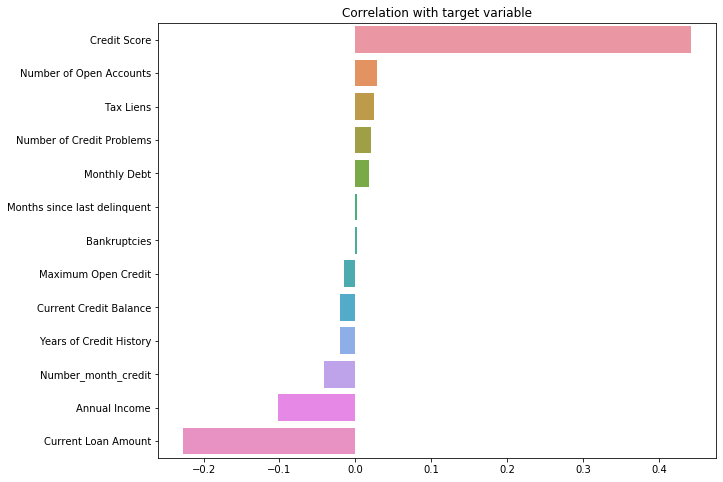

In [23]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Оценка признака "Credit Score" в разрезе целевой переменной**

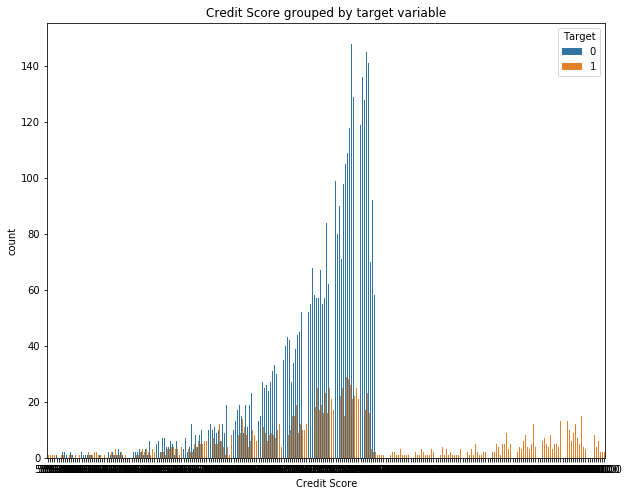

In [24]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Credit Score", hue=TARGET_NAME, data=df_train)
plt.title('Credit Score grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [ ]:
Tax Liens

**Оценка признака "Tax Liens" в разрезе целевой переменной**

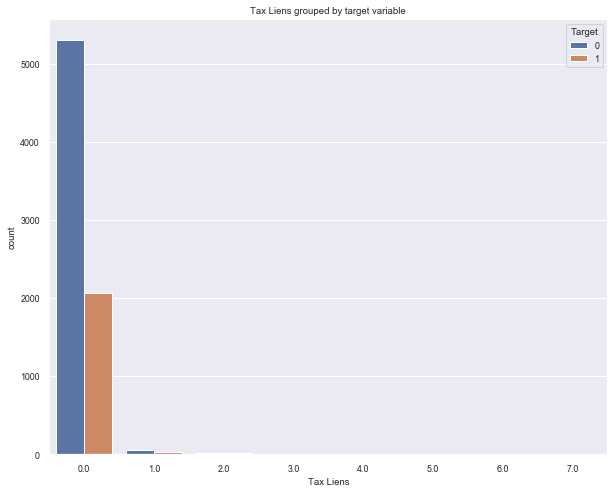

In [106]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Tax Liens", hue=TARGET_NAME, data=df_train)
plt.title('Tax Liens grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

**Оценка признака "Number of Open Accounts" в разрезе целевой переменной**

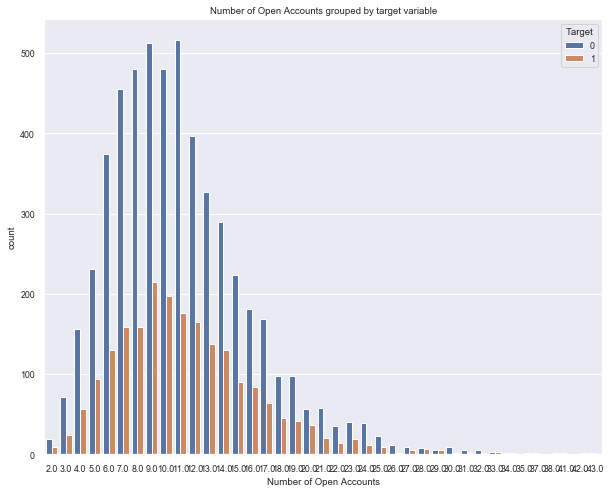

In [107]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Number of Open Accounts", hue=TARGET_NAME, data=df_train)
plt.title('Number of Open Accounts grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Предполагаем что Number of Open Accounts = 7 и 8 имеют схожие доли в разрезе целевой переменной. 
Если это действительно так, то можно будет, например, объединить их в одну категорию.

*Рассчитаем наблюдаемые частоты*

In [34]:
df_train['Id'] = df_train.index
numacc_and_target_s = df_train.loc[df_train['Number of Open Accounts'].isin([7, 8]), ['Id', 'Number of Open Accounts', 'Credit Default']]

In [35]:
table = numacc_and_target_s.pivot_table(values='Id', index='Number of Open Accounts', columns='Credit Default', aggfunc='count')
table

Credit Default,0,1
Number of Open Accounts,,
7.0,455,158
8.0,480,158


*Проверим нашу гипотезу, используя критерий Хи-квадрат Пирсона*

In [36]:
chi2, p, _, _ = chi2_contingency(table)
p

0.7294091850030766

P-value получилось больше выбранного уровня значимости, соответственно у нас нет оснований для отвержения нулевой гипотезы и можно допустить, что категории 7 и 8 одинаково влияют на целевую переменную и их можно объединить в одну категорию. 

\*Для других признаков PAY_2, PAY_3, и т.д. следует провести аналогичный анализ и после этого решать о целесообразности изменения категорий или построения новых признаков.

**Оценка признака "LIMIT_BAL" в разрезе целевой переменной**

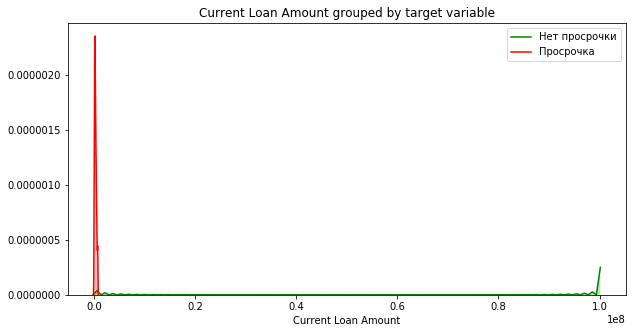

In [39]:
limit_bal_with_target = df_train[['Current Loan Amount', TARGET_NAME]]
limit_bal = limit_bal_with_target['Current Loan Amount']
limit_bal_target_0 = limit_bal[limit_bal_with_target[TARGET_NAME] == 0]
limit_bal_target_1 = limit_bal[limit_bal_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(limit_bal_target_0, shade=True, label='Нет просрочки', color='g')
sns.kdeplot(limit_bal_target_1, shade=True, label='Просрочка', color='r')

plt.xlabel('Current Loan Amount')
plt.title('Current Loan Amount grouped by target variable')
plt.show()

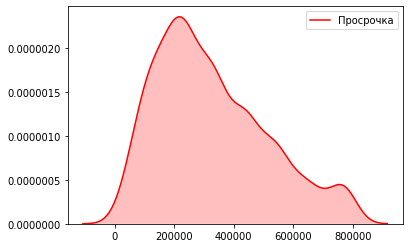

In [53]:
sns.kdeplot(limit_bal_target_1, shade=True, label='Просрочка', color='r')

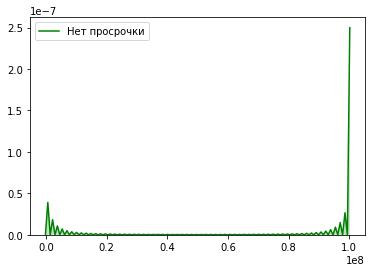

In [54]:
sns.kdeplot(limit_bal_target_0, shade=True, label='Нет просрочки', color='g')

*Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка*

In [41]:
shapiro(limit_bal)

(0.37670987844467163, 0.0)

По полученному значению p-value, которое сильно меньше 0.05, можем заключить, что гипотеза о "нормальности" отвергается.

*Для достоверности произведём визуальную оценку распределения признака, а так же построим QQ-график*

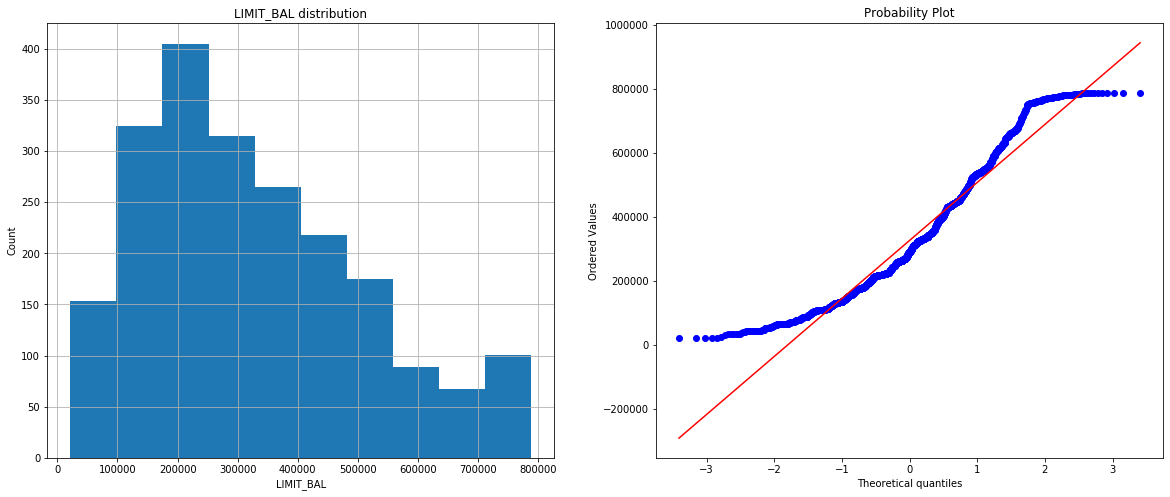

In [56]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('LIMIT_BAL')
ax1.set_ylabel('Count')
ax1.set_title('LIMIT_BAL distribution')
limit_bal_target_1.hist()

plt.subplot(122)
probplot(limit_bal_target_1, dist='norm', plot=plt)

plt.show()

*Оценим эквивалентность мат. ожадиний, в исследуемых группах, с помощью критерия Манна-Уитни*

In [57]:
mannwhitneyu(limit_bal_target_0, limit_bal_target_1)

MannwhitneyuResult(statistic=5169258.0, pvalue=2.923443678733522e-10)

Согласно значению p-value, гипотеза о равности мат. ожиданий отвергается, но стоит ради дополнительной проверки обратиться к доверительным интервалам.

*Построим доверительные интервалы для средних значений, каждой из двух групп и сравним их*

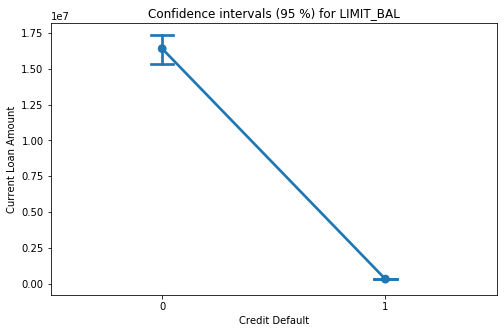

In [59]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Current Loan Amount', data=limit_bal_with_target, capsize=.1)

plt.title('Confidence intervals (95 %) for LIMIT_BAL')
plt.show()

По данному графику так же видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, не пересекаются, что подтверждает результаты полученные с помощью критерия Манна-Уитни.

Это означает, что группы из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют различные распределения и этот признак может быть полезен для определения значения целевой переменной.

**Оценка признака "Monthly Debt" в разрезе целевой переменной**

In [61]:
PAY_AMT = 'Monthly Debt'

pay_amt_with_target = df_train[[PAY_AMT, TARGET_NAME]]
pay_amt = pay_amt_with_target[PAY_AMT]
pay_amt_target_0 = pay_amt[pay_amt_with_target[TARGET_NAME] == 0]
pay_amt_target_1 = pay_amt[pay_amt_with_target[TARGET_NAME] == 1]

In [62]:
mannwhitneyu(pay_amt_target_0, pay_amt_target_1)

MannwhitneyuResult(statistic=5534935.5, pvalue=0.03183394406726229)

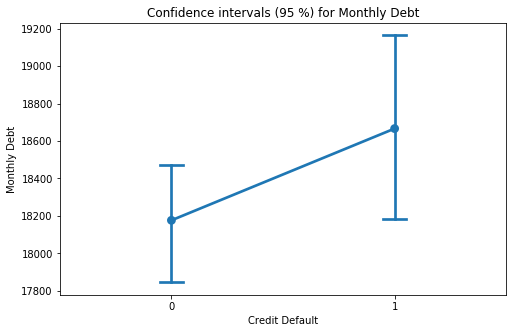

In [63]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y=PAY_AMT, data=pay_amt_with_target, capsize=.1)

plt.title(f'Confidence intervals (95 %) for {PAY_AMT}')
plt.show()

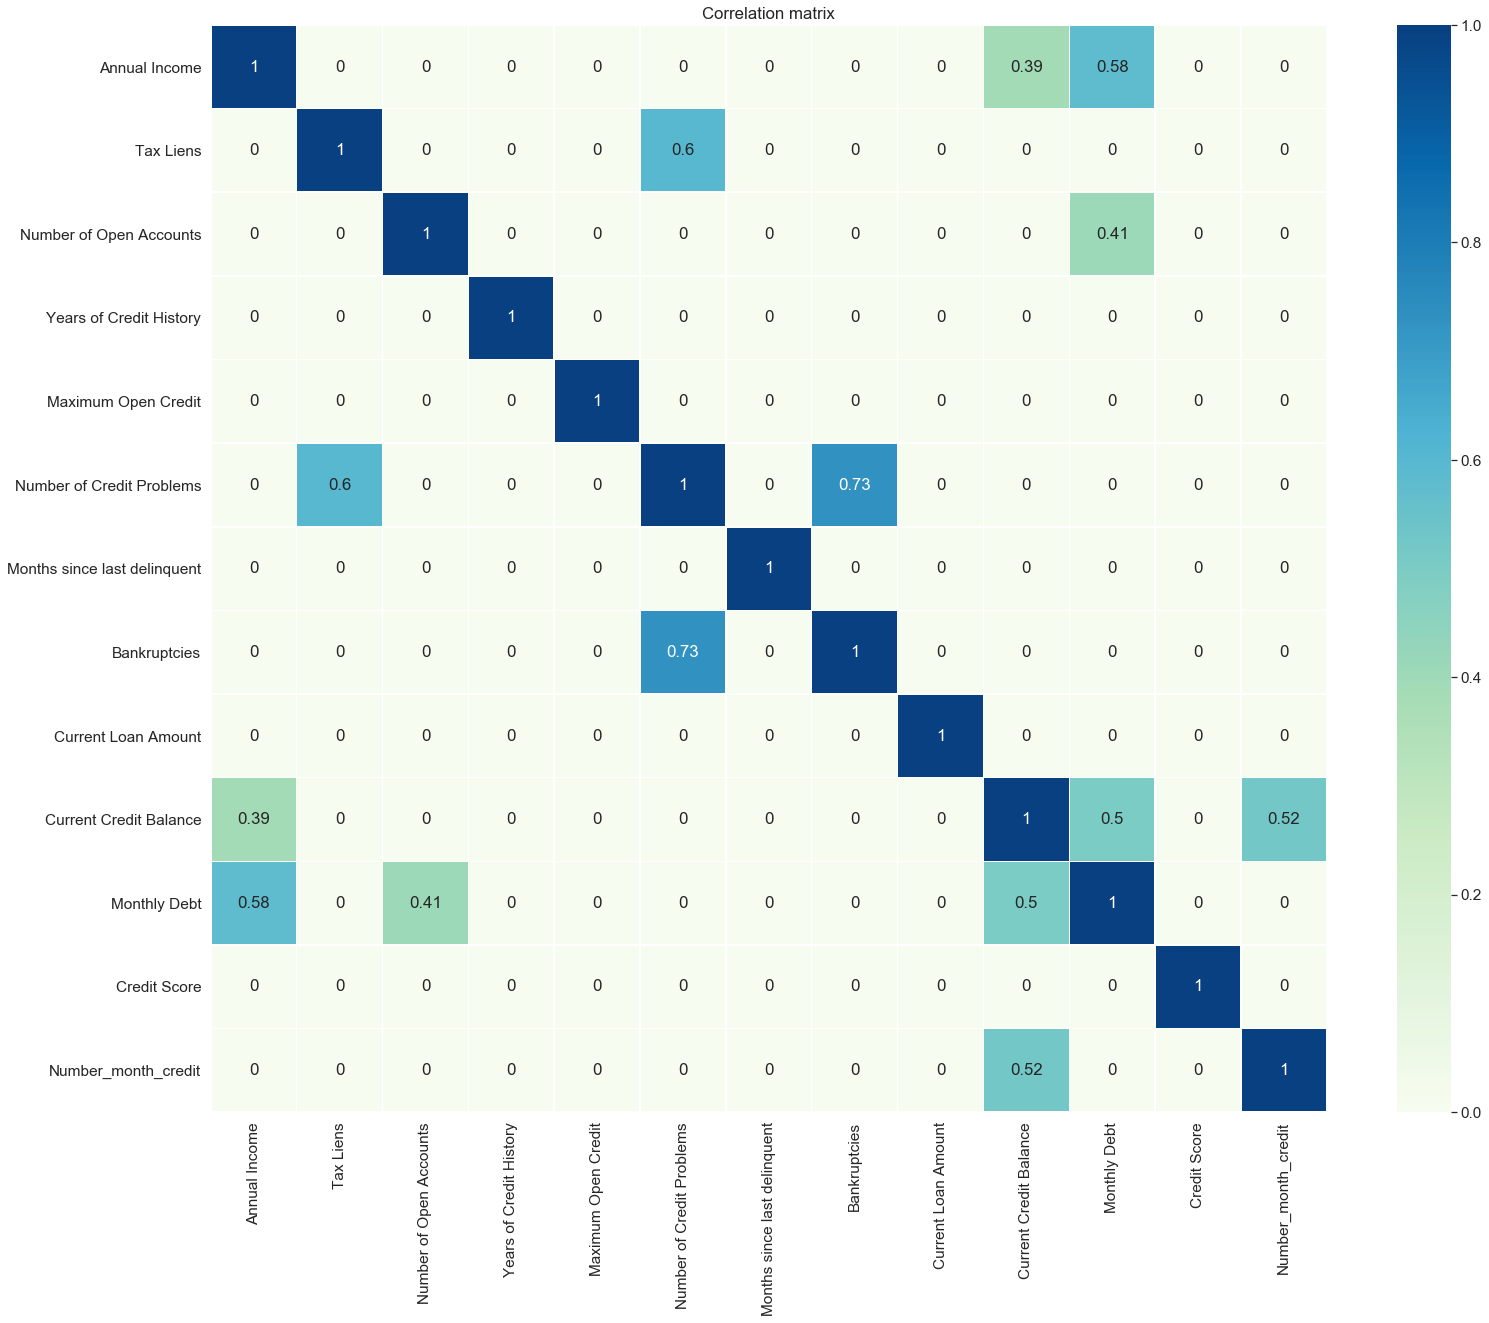

In [64]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = df_train[BASE_FEATURE_NAMES].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [65]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_train,
                               test_size=0.2,
                               shuffle=True,
                               stratify=df_train['Credit Default'],
                               random_state=12)

In [68]:
train['Credit Default'].value_counts(normalize=True)

0    0.718333
1    0.281667
Name: Credit Default, dtype: float64

In [69]:
test['Credit Default'].value_counts(normalize=True)

0    0.718
1    0.282
Name: Credit Default, dtype: float64

**Проверим распределения вещественных признаков на трейне и тесте**

In [95]:
NUM_FEATURE_NAMES = ['Annual Income', 'Number of Open Accounts','Years of Credit History',
 
 'Months since last delinquent',
  'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default',
 'Number_month_credit']

Annual Income
MannwhitneyuResult(statistic=4399257.0, pvalue=0.08961270785140663)


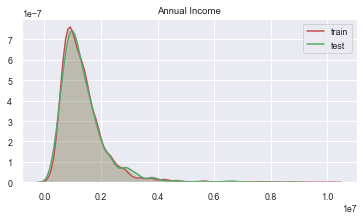

Number of Open Accounts
MannwhitneyuResult(statistic=4499112.5, pvalue=0.49527041659773513)


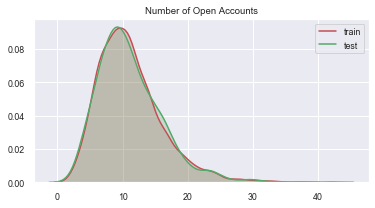

Years of Credit History
MannwhitneyuResult(statistic=4399386.0, pvalue=0.08988738053723139)


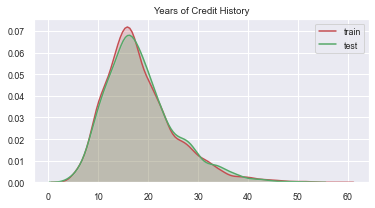

Months since last delinquent
MannwhitneyuResult(statistic=3709658.5, pvalue=2.907729177969476e-26)


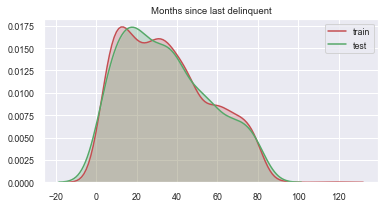

Current Loan Amount
MannwhitneyuResult(statistic=4445175.5, pvalue=0.23223413143242816)


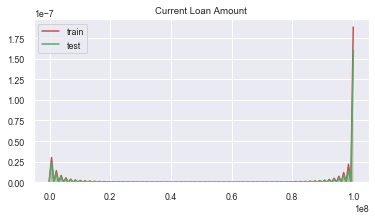

Current Credit Balance
MannwhitneyuResult(statistic=4495955.0, pvalue=0.4784982233833305)


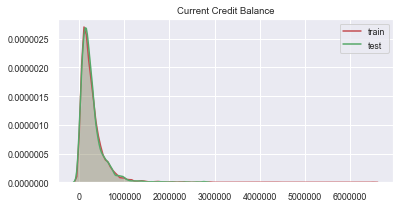

Monthly Debt
MannwhitneyuResult(statistic=4469497.0, pvalue=0.3421241263671083)


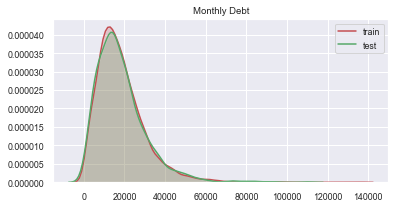

Credit Score
MannwhitneyuResult(statistic=4223529.0, pvalue=0.00011377546038971668)


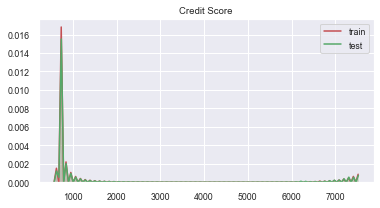

Credit Default
MannwhitneyuResult(statistic=4498500.0, pvalue=0.4897648063167819)


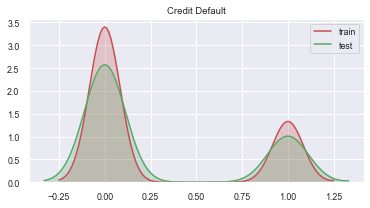

Number_month_credit
MannwhitneyuResult(statistic=4473172.0, pvalue=0.36029282311851984)


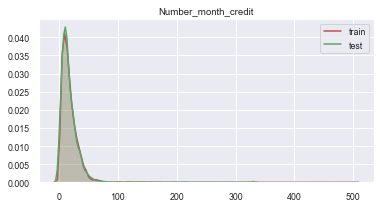

In [96]:
figsize = (6, 3)
for col in NUM_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(train[col], shade=True, label='train', color='r')
    sns.kdeplot(test[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(train[col], test[col]))
    plt.legend()
    plt.title(col)
    plt.show()

In [97]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_train.select_dtypes(exclude=numerics)
newdf.columns

Index(['Home Ownership', 'Years in current job', 'Purpose', 'Term'], dtype='object')

In [98]:
CAT_FEATURE_NAMES = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

**Проверим распределения категориальных признаков на трейне и тесте**

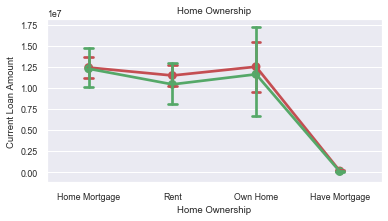

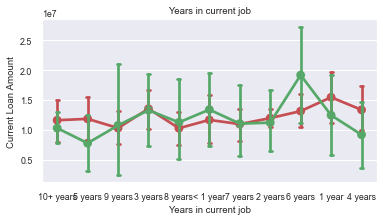

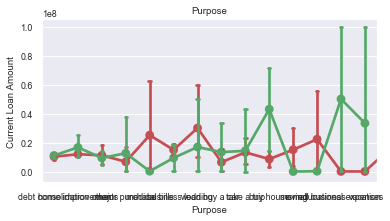

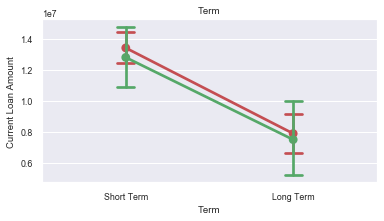

In [99]:
num_feature = 'Current Loan Amount'
for col in CAT_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.pointplot(x=col, y=num_feature, data=train, capsize=.1, label='train', color='r')
    sns.pointplot(x=col, y=num_feature, data=test, capsize=.1, label='test', color='g')
    plt.title(col) 
    plt.show()

**Сократим количество значений в признаке**

In [100]:
train['Home Ownership'].unique()

array(['Home Mortgage', 'Rent', 'Own Home', 'Have Mortgage'], dtype=object)

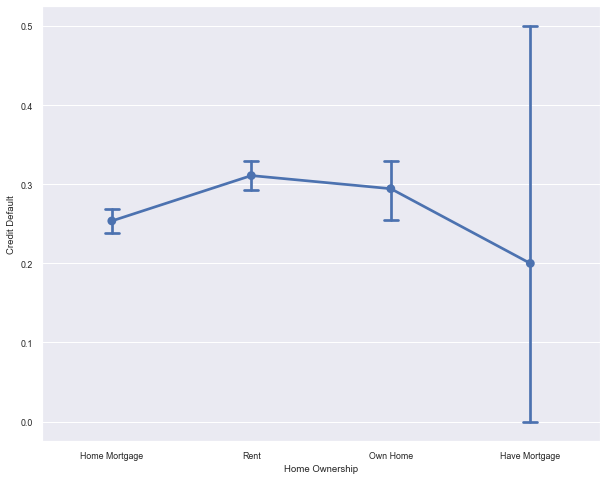

In [101]:
plt.figure(figsize=(10, 8))

sns.pointplot(x='Home Ownership', y='Credit Default', data=train, capsize=.1,);

In [102]:
def change_pay_1(df):
    df.loc[df['Home Ownership'].isin(["Home Mortgage", "Rent","Own Home"]),'Home Ownership'] = 0
    df.loc[df['Home Ownership'].isin(["Have Mortgage"]), 'Home Ownership'] = 2
    return df


test = change_pay_1(test)
train = change_pay_1(train)

In [103]:
train['Home Ownership'].value_counts()

0    5990
2      10
Name: Home Ownership, dtype: int64

In [104]:
test['Home Ownership'].value_counts()

0    1498
2       2
Name: Home Ownership, dtype: int64

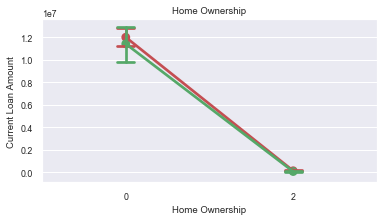

In [105]:
num_feature = 'Current Loan Amount'
col = 'Home Ownership'
plt.figure(figsize=figsize)
sns.pointplot(x=col, y=num_feature, data=train, capsize=.1, label='train', color='r')
sns.pointplot(x=col, y=num_feature, data=test, capsize=.1, label='test', color='g')
plt.title(col)
plt.show()

In [108]:
pwd

'C:\\Users\\lobapid3\\Documents\\Python Scripts\\web1'